In [232]:
import os, sys
import esutil
import healpy as hp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [233]:
def treecorr_xi(lens, random=None, filename=None, rootdir=None, 
		nbins=20, min_sep=2.5, max_sep=250, sep_units='arcmin', bin_slop=0.05, 
        npatch=10, var_method='jackknife', cen_file = None):
    
    import treecorr
    
    if cen_file != None:
        if os.path.exists(cen_file):
            print ('Saved cen_file exists:',cen_file)
            cen_file_switch_on = cen_file
            npatch=1
        else : 
            print ('Create cen_file=',cen_file)
            cen_file_switch_on = None
    
    
    #temp_dir=filename.split('.txt')[0]
    cat_l = treecorr.Catalog(ra=lens['RA'], dec=lens['DEC'], w=lens['WEIGHT'], 
                             ra_units='deg', dec_units='deg', npatch=npatch) #, 
                             #patch_centers=cen_file_switch_on )

    #if cen_file_switch_on == None : 
    #    cat_l.write_patch_centers(cen_file)
       
    cat_r = treecorr.Catalog(ra=random['RA'], dec=random['DEC'], w=random['WEIGHT'], 
                             ra_units='deg', dec_units='deg', patch_centers=cat_l.patch_centers)
                             #patch_centers=cen_file_switch_on )
    
    dd = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                            max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                            var_method=var_method,
                            num_threads=30, verbose=1)
    dr = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                                max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                                var_method=var_method,
                                num_threads=30, verbose=1)
    rd = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                                max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                                var_method=var_method,
                                num_threads=30, verbose=1)
    rr = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep,
                                max_sep=max_sep, sep_units=sep_units, bin_slop=bin_slop, 
                                var_method=var_method,
                                num_threads=30, verbose=1)

    dd.process(cat_l)
    dr.process(cat_l, cat_r)
    rd.process(cat_r, cat_l)
    rr.process(cat_r)

    #xi,varxi = dd.calculateXi(rr,dr)
    dd.write(filename,rr,dr,rd)
    cov_jk = dd.cov
    
    
    #cov_jk = dd.estimate_cov(var_method)
    #cov_jk_rand = rr.estimate_cov(var_method)
    cov_filename=filename.split('.txt')[0]+'.cov'
    np.savetxt(cov_filename, cov_jk)
    
    print ('save to', filename)


In [234]:
sys.path.append('../code_py3/')
from cmass_modules import io
from utils import appendColumn
#from utils import matchCatalogsbyPosition, hpHEALPixelToRaDec, HealPixifyCatalogs, spatialcheck
#from xd import mixing_color_elg, assignELGProb, doVisualization_1d, XD_fitting_X
#from run_DMASS_Y3 import priorCut_test
#from systematics import *
sys.path.append('../../DMASS-analysis/measurements/code_py3/')
from ggl_mcal import run_ng_jk, run_nn_jk, run_nk_jk, compute_eix_jk, compute_Rgamma_jk, construct_jk, compute_jkcov, save_results

In [235]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [369]:
rootdir = '../output/test/'

In [370]:
# calling the final catalog 
input_path = rootdir+'/test_cat/'
input_keyword = 'Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000'
gold_spt_prob = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=None)
pcut = gold_spt_prob['ELG_PROB'] > 0.01
gold_spt_prob_pcut = gold_spt_prob[ pcut ]


Calling catalogs >>>
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000001.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000002.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000003.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000004.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000005.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000006.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000007.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000008.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000009.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000010.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000011.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000012.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000013.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000014.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000015.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000016.fits
DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m30_000017.fits
reading 1/17 ../output/test//test_cat/DMASS_Y3_GOLD_2_0_SPT_ra10_20_decm40_m3

ValueError: no field of name ELG_PROB

In [ ]:
N_delg = int(np.sum(gold_spt_prob_pcut['ELG_PROB']))
print (N_delg)

In [343]:
# calling Y3 GOLD footprint map
# downloaded from https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3A2_Gold_footprint
mapname='../data/masks/y3a2_footprint_griz_1exp_v2.0.fits.gz'
hpmap_y3gold = hp.read_map(mapname)
goodmask = hp.mask_good(hpmap_y3gold)
hpind_y3gold = np.arange(hpmap_y3gold.size)
goodind = hpind_y3gold[goodmask]
# Generate mask for eboss ELG
#mask_train = np.in1d(elg['HEALIndex'],goodind)

/n/des/lee.5922/programs/anaconda3/envs/env_py3/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [344]:
from utils import uniform_random_on_sphere, spatialcheck, HealPixifyCatalogs

In [371]:
randoms = uniform_random_on_sphere(gold_spt_prob, size = N_delg*10, z=False )
randoms = randoms[ np.in1d( randoms['HPIX'],goodind) ]

In [372]:
weight_data = gold_spt_prob_pcut['ELG_PROB']
weight_rand = np.ones(randoms.size)
gold_spt_prob_pcut = appendColumn(gold_spt_prob_pcut, name='WEIGHT', value=weight_data)
randoms = appendColumn(randoms, name='WEIGHT', value=weight_rand)

In [373]:
#filename = '/n/des/lee.5922/data/eboss_cat/eBOSS_ELG_full_ALLdata-vDR16.fits'
filename = '/n/des/lee.5922/data/eboss_cat/eBOSS_ELG_clustering_data-NGC-vDR16.fits'
elg_ngc = esutil.io.read(filename)
filename = '/n/des/lee.5922/data/eboss_cat/eBOSS_ELG_clustering_random-NGC-vDR16.fits'
random_elg_ngc = esutil.io.read(filename)

weight_data = elg_ngc['WEIGHT_FKP']* elg_ngc['WEIGHT_SYSTOT']*elg_ngc['WEIGHT_CP']*elg_ngc['WEIGHT_NOZ']
weight_rand = random_elg_ngc['WEIGHT_FKP']* random_elg_ngc['WEIGHT_SYSTOT']*random_elg_ngc['WEIGHT_CP']*random_elg_ngc['WEIGHT_NOZ']
elg_ngc = appendColumn(elg_ngc, name='WEIGHT', value=weight_data)
random_elg_ngc = appendColumn(random_elg_ngc, name='WEIGHT', value=weight_rand)

In [374]:
#filename = '/n/des/lee.5922/data/eboss_cat/eBOSS_ELG_full_ALLdata-vDR16.fits'
filename = '/n/des/lee.5922/data/eboss_cat/eBOSS_ELG_clustering_data-SGC-vDR16.fits'
elg = esutil.io.read(filename)
filename = '/n/des/lee.5922/data/eboss_cat/eBOSS_ELG_clustering_random-SGC-vDR16.fits'
random_elg = esutil.io.read(filename)

In [375]:
weight_data = elg['WEIGHT_FKP']* elg['WEIGHT_SYSTOT']*elg['WEIGHT_CP']*elg['WEIGHT_NOZ']
weight_rand = random_elg['WEIGHT_FKP']* random_elg['WEIGHT_SYSTOT']*random_elg['WEIGHT_CP']*random_elg['WEIGHT_NOZ']
elg = appendColumn(elg, name='WEIGHT', value=weight_data)
random_elg = appendColumn(random_elg, name='WEIGHT', value=weight_rand)

In [268]:

# Add healpix index to ELG catalog
healConfig = {'map_inside':4096,
              'out_nside':4096,
              'nest':False}
elg = HealPixifyCatalogs(catalog=elg, healConfig=healConfig, ratag='RA', dectag = 'DEC')
random_elg = HealPixifyCatalogs(catalog=random_elg, healConfig=healConfig, ratag='RA', dectag = 'DEC')

/n/des/lee.5922/programs/anaconda3/envs/env_py3/lib/python3.8/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)


KeyboardInterrupt: 

In [384]:
npatch=100

twoptdir = rootdir+'/2pt/elg_sgc_jk/'
tempdir = twoptdir+'/{}/'.format(npatch)
#cen_file = tempdir + 'nn_cen_file.txt'
filename = tempdir + 'nn.lens.txt'

os.system('rm -rf '+tempdir)
os.makedirs( tempdir, exist_ok=True )

treecorr_xi(elg, random=random_elg,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.1,
        npatch=npatch, cen_file=None, var_method='jackknife', )

save to ../output/test//2pt/elg_sgc_jk//100/nn.lens.txt


In [385]:
npatch=100

twoptdir = rootdir+'/2pt/elg_ngc_jk/'
tempdir = twoptdir+'/{}/'.format(npatch)
#cen_file = tempdir + 'nn_cen_file.txt'
filename = tempdir + 'nn.lens.txt'

os.system('rm -rf '+tempdir)
os.makedirs( tempdir, exist_ok=True )

treecorr_xi(elg_ngc, random=random_elg_ngc,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.1,
        npatch=npatch, cen_file=None, var_method='jackknife', )

save to ../output/test//2pt/elg_ngc_jk//100/nn.lens.txt


In [386]:
npatch=100

twoptdir = rootdir+'/2pt/delg_jk/'
tempdir = twoptdir+'/{}/'.format(npatch)
#cen_file = tempdir + 'nn_cen_file.txt'
filename = tempdir + 'nn.lens.txt'

os.system('rm -rf '+tempdir)
os.makedirs( tempdir, exist_ok=True )

treecorr_xi(gold_spt_prob_pcut, random=randoms,
        filename=filename, rootdir = tempdir, 
        nbins=20, min_sep=2.5, max_sep=250., sep_units='arcmin', bin_slop=0.1,
        npatch=npatch, cen_file=None, var_method='jackknife', )

save to ../output/test//2pt/delg_jk//100/nn.lens.txt


In [387]:
tempdir = rootdir+'/2pt/elg_sgc_jk/'
cov_elg= np.genfromtxt(tempdir+'/{}/nn.lens.cov'.format(npatch))
err_elg = np.sqrt(cov_elg.diagonal())
_, meanr_elg, _, galaxy_xi_elg, xi_err_elg, DD_elg_sgc, RR_elg_sgc, DR_elg_sgc, _, npairs_elg_sgc = \
np.genfromtxt(tempdir+'/{}/nn.lens.txt'.format(npatch), unpack=True)

In [388]:
tempdir = rootdir+'/2pt/elg_ngc_jk/'
cov_elg_ngc= np.genfromtxt(tempdir+'/{}/nn.lens.cov'.format(npatch))
err_elg_ngc = np.sqrt(cov_elg.diagonal())
_, meanr_elg_ngc, _, galaxy_xi_elg_ngc, xi_err_elg_ngc, \
DD_elg_ngc, RR_elg_ngc, DR_elg_ngc, _, npairs_elg_ngc = \
np.genfromtxt(tempdir+'/{}/nn.lens.txt'.format(npatch), unpack=True)

In [389]:
DD_elg = DD_elg_sgc + DD_elg_ngc
DR_elg = DR_elg_sgc + DR_elg_ngc
RR_elg = RR_elg_sgc + RR_elg_ngc
xi_elg_total = (DD_elg + RR_elg - 2*DR_elg)/RR_elg
err_elg_total = 1./np.sqrt( 1./cov_elg.diagonal() + 1./cov_elg_ngc.diagonal() )

In [390]:
tempdir = rootdir+'/2pt/delg_jk/'
cov_delg= np.genfromtxt(tempdir+'/{}/nn.lens.cov'.format(npatch))
err_delg = np.sqrt(cov_delg.diagonal())
_, meanr_delg, _, galaxy_xi_delg, xi_err_delg,_,_,_,_,_ = \
np.genfromtxt(tempdir+'/{}/nn.lens.txt'.format(npatch), unpack=True)

Text(0.5, 0.1, '${\\rm Very~Preliminary}$')

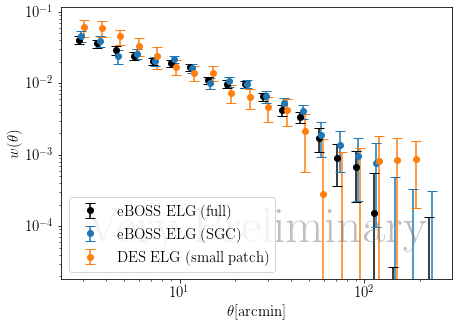

In [393]:
fig, ax = plt.subplots(figsize=(7,5))

ax.errorbar(meanr_elg, xi_elg_total, yerr=err_elg_total, fmt='o', color='k', capsize=5, label='${\\rm eBOSS ~ELG~(full)}$')
ax.errorbar(meanr_elg*1.03, galaxy_xi_elg, yerr=err_elg, fmt='o', capsize=5, label='${\\rm eBOSS ~ELG~(SGC)}$')
#ax.errorbar(meanr_elg_ngc, galaxy_xi_elg_ngc, yerr=err_elg_ngc, fmt='o', capsize=5, label='${\\rm eBOSS ~ELG~(NGC)}$')
ax.errorbar(meanr_delg*1.06, galaxy_xi_delg, yerr=err_delg, fmt='o',capsize=5, label='${\\rm DES ~ELG ~(small~patch)}$')


ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=15)
ax.set_xlabel('$\\theta {\\rm[arcmin]}$', fontsize=15)
ax.set_ylabel('$w(\\theta)$',fontsize=15)

ax.tick_params(labelsize=15)

ax.text(0.5, 0.1, '${\\rm Very~Preliminary}$', transform=ax.transAxes,
        fontsize=50, color='gray', alpha=0.5,
        ha='center', va='bottom', rotation='0')

Text(0.5, 0.1, '${\\rm Very~Preliminary}$')

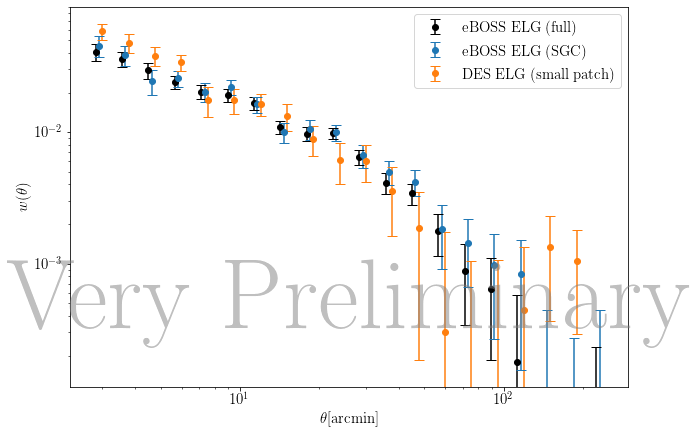

In [339]:
fig, ax = plt.subplots(figsize=(10,7))

ax.errorbar(meanr_elg, xi_elg_total, yerr=err_elg_total, fmt='o', color='k', capsize=5, label='${\\rm eBOSS ~ELG~(full)}$')
ax.errorbar(meanr_elg*1.03, galaxy_xi_elg, yerr=err_elg, fmt='o', capsize=5, label='${\\rm eBOSS ~ELG~(SGC)}$')
#ax.errorbar(meanr_elg_ngc, galaxy_xi_elg_ngc, yerr=err_elg_ngc, fmt='o', capsize=5, label='${\\rm eBOSS ~ELG~(NGC)}$')
ax.errorbar(meanr_delg*1.06, galaxy_xi_delg, yerr=err_delg, fmt='o',capsize=5, label='${\\rm DES ~ELG ~(small~patch)}$')


ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=15)
ax.set_xlabel('$\\theta {\\rm[arcmin]}$', fontsize=15)
ax.set_ylabel('$w(\\theta)$',fontsize=15)

ax.tick_params(labelsize=15)

ax.text(0.5, 0.1, '${\\rm Very~Preliminary}$', transform=ax.transAxes,
        fontsize=100, color='gray', alpha=0.5,
        ha='center', va='bottom', rotation='0')